# Exploring Two or More Variables

## Hexagonal Binning and Contours (Plotting Numeric Versus Numeric Data)

In [55]:
import pandas as pd
import seaborn as sns

In [56]:
kc_tax0 = pd.read_csv('./data/kc_tax.csv')
kc_tax0

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


In [57]:
kc_tax0_strip = kc_tax0.loc[
    (kc_tax0["TaxAssessedValue"] < 750_000) &
    (kc_tax0["SqFtTotLiving"] > 100) &
    (kc_tax0["SqFtTotLiving"] < 3500),
    :
]

kc_tax0_strip

,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


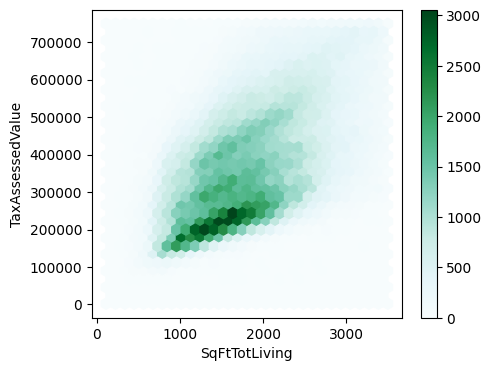

In [58]:
ax = kc_tax0_strip.plot.hexbin(x="SqFtTotLiving", y="TaxAssessedValue", gridsize=30, sharex=False, figsize=(5,4))

As you can see, _hexagonal binning plot_ shows the tax-assessed value, square foot and the count of records for bins at the same time.

## Contours

We take a sample from our dataset because it takes too much time to render.

In [59]:
sample = kc_tax0_strip.sample(n=5000, random_state=42)

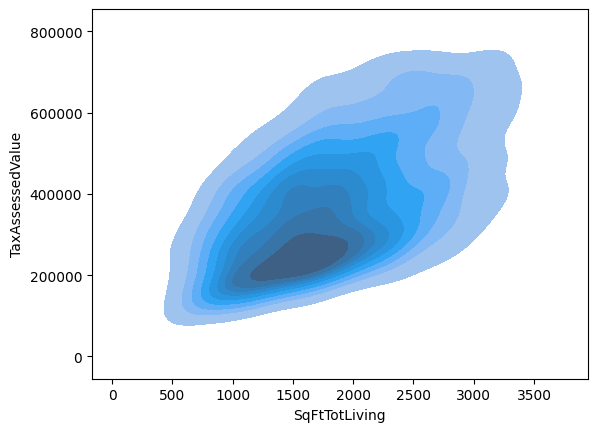

In [60]:
ax = sns.kdeplot(x=sample.SqFtTotLiving, y=sample.TaxAssessedValue, fill=True)

## Contingency Tables

In [61]:
lc_loans = pd.read_csv("./data/lc_loans.csv")
lc_loans

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B
...,...,...
450956,Current,D
450957,Current,D
450958,Current,D
450959,Current,D


In [62]:
crosstab = lc_loans.pivot_table(index="grade", columns="status", aggfunc=lambda x: len(x), margins=True)
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [65]:
df = crosstab.loc['A':'G',:].copy()
df.loc[:,'Charged Off':'Late'] = df.loc[:, 'Charged Off':'Late'].div(df["All"], axis='index')

df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df
perc_crosstab

/tmp/ipykernel_89794/3740777745.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.0215478  0.04005439 0.04982834 0.06740983 0.08165728 0.1182579
 0.12619562]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:,'Charged Off':'Late'] = df.loc[:, 'Charged Off':'Late'].div(df["All"], axis='index')
/tmp/ipykernel_89794/3740777745.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.69045386 0.70901262 0.73570217 0.71732838 0.70793587 0.65437074
 0.61400802]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:,'Charged Off':'Late'] = df.loc[:, 'Charged Off':'Late'].div(df["All"], axis='index')
/tmp/ipykernel_89794/3740777745.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.28

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187
